In [1]:
# Data Handling and Analysis
import pandas as pd
import numpy as np
from datetime import date, timedelta
from scipy import stats 
import StockDataProcessor

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

# Plotting and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations
import warnings
warnings.filterwarnings("ignore")

# Configuração dos gráficos
from matplotlib import rc

# Estilo dos gráficos
# Referência: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('Solarize_Light2')
%config InlineBackend.figure_format = 'retina'  # Formato das imagens

# Configurações de fontes
rc('font', **{"family":"sans-serif","sans-serif":["DejaVu Sans"], "size":9})
rc('mathtext', **{"default":"regular"})

In [2]:
df = pd.read_csv('IBOVDia_13-11-24.csv', encoding='latin-1', skiprows=1, sep = ";", skipfooter=2)
# df = df.set_index("nome")
df['pesquisa'] = df.index + '.SA'
df

,Código,Ação,Tipo,Qtde. Teórica,Part. (%),pesquisa
ALOS3,ALLOS,ON NM,502.481.592,"0,516",NaN,ALOS3.SA
ALPA4,ALPARGATAS,PN N1,166.460.180,"0,054",NaN,ALPA4.SA
ABEV3,AMBEV S/A,ON,4.394.835.131,"2,630",NaN,ABEV3.SA
ASAI3,ASSAI,ON NM,1.349.687.675,"0,463",NaN,ASAI3.SA
AURE3,AUREN,ON NM,291.727.616,"0,138",NaN,AURE3.SA
...,...,...,...,...,...,...
VAMO3,VAMOS,ON NM,485.166.826,"0,131",NaN,VAMO3.SA
VBBR3,VIBRA,ON NM,1.023.392.529,"1,092",NaN,VBBR3.SA
VIVA3,VIVARA S.A.,ON NM,125.823.025,"0,148",NaN,VIVA3.SA
WEGE3,WEG,ON NM,1.269.032.828,"3,346",NaN,WEGE3.SA


In [3]:
# Define stock symbols and company names
names_stocks = df['pesquisa']
names_companies = df['Código']
start_date = date.today() - timedelta(days=365)
end_date = date.today()

# Initialize the processor
processor = StockDataProcessor.StockDataProcessor(names_stocks, names_companies, start_date, end_date)

# Process all stocks
processor.process_all_stocks()

# Combine all price data
processor.combine_all_price_data()

df_adj_close = processor.combined_data['Adj Close']
df_adj_close = df_adj_close.set_index('Date')
df_adj_close = df_adj_close.pct_change()
df_adj_close = df_adj_close.drop(columns=['ALLOS', 'BRAVA']) # mmuito valores ausentes
df_adj_close =  df_adj_close[1:]
df_adj_close


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Price,ALPARGATAS,AMBEV S/A,ASSAI,AUREN,AZUL,AZZAS 2154,B3,BBSEGURIDADE,BRADESCO_x,BRADESCO_y,...,TOTVS,TRAN PAULIST,ULTRAPAR,USIMINAS,VALE,VAMOS,VIBRA,VIVARA S.A.,WEG,YDUQS PART
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-28 00:00:00+00:00,0.027412,0.005155,0.002224,0.007592,0.009643,0.010974,0.023220,0.003154,0.004944,0.009340,...,0.014204,-0.000410,0.020450,0.007682,0.002183,-0.004372,0.007838,0.027798,0.006737,-0.014588
2023-11-29 00:00:00+00:00,-0.018143,-0.025641,-0.025888,-0.006164,-0.020225,-0.014474,0.002269,-0.011317,-0.005622,-0.004935,...,-0.002384,-0.012290,-0.009219,-0.015248,-0.000272,0.024149,0.034767,0.005548,-0.006983,-0.025788
2023-11-30 00:00:00+00:00,0.040217,0.029323,-0.018223,0.012405,-0.031537,-0.009680,0.003774,-0.004770,0.009187,0.008680,...,-0.005078,0.001244,0.021440,0.014194,0.005446,-0.010718,0.032272,0.025172,0.001758,-0.015196
2023-12-01 00:00:00+00:00,0.005225,0.028488,-0.001547,0.011572,0.007105,0.002865,0.017293,-0.012780,0.005602,0.003073,...,0.015911,0.018227,0.013465,0.045802,0.018551,0.018418,0.034261,0.009754,0.017256,0.028870
2023-12-04 00:00:00+00:00,-0.055094,-0.001420,-0.017816,0.002692,-0.058201,-0.033776,0.000739,-0.002589,0.003294,-0.007424,...,0.009456,0.001221,-0.004299,0.008516,-0.022467,-0.014893,-0.039337,-0.019987,-0.000575,-0.029511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-18 00:00:00+00:00,0.001477,-0.017405,0.018414,-0.018036,-0.075047,-0.007362,-0.026290,0.003592,0.009151,0.014043,...,-0.005667,-0.005372,-0.043028,0.016393,0.012491,0.009042,-0.018460,-0.002083,-0.006440,-0.012695
2024-11-19 00:00:00+00:00,0.011799,0.000805,-0.030598,0.009184,-0.006085,-0.014833,0.002000,0.019982,0.003298,0.007289,...,0.020449,-0.002077,-0.005417,0.001613,0.002259,0.046595,0.000000,-0.000418,0.002407,0.003956
2024-11-21 00:00:00+00:00,-0.033528,-0.003218,-0.004304,-0.016178,-0.008163,-0.033269,-0.019960,-0.021053,-0.007395,-0.003618,...,-0.017083,0.000000,-0.018519,-0.025765,-0.001040,0.051370,-0.013761,-0.030911,-0.007390,-0.013793


In [4]:
df_adj_close_cor = df_adj_close.corr()
df_adj_close_cor

Price,ALPARGATAS,AMBEV S/A,ASSAI,AUREN,AZUL,AZZAS 2154,B3,BBSEGURIDADE,BRADESCO_x,BRADESCO_y,...,TOTVS,TRAN PAULIST,ULTRAPAR,USIMINAS,VALE,VAMOS,VIBRA,VIVARA S.A.,WEG,YDUQS PART
Price,,,,,,,,,,,,,,,,,,,,,
ALPARGATAS,1.000000,0.255744,0.388363,0.231899,0.270161,0.415879,0.287570,0.147853,0.196349,0.213796,...,0.305471,0.092472,0.231978,0.184582,0.166837,0.331471,0.278109,0.298377,0.067003,0.414199
AMBEV S/A,0.255744,1.000000,0.159894,0.175734,0.137826,0.184253,0.346204,0.202087,0.345330,0.333245,...,0.116878,0.174712,0.363857,0.097252,0.103500,0.189866,0.138624,0.163827,0.134985,0.133007
ASSAI,0.388363,0.159894,1.000000,0.242024,0.298334,0.356826,0.362662,0.194002,0.254928,0.231805,...,0.268583,0.182773,0.289630,0.166465,0.145701,0.477527,0.186810,0.306539,0.132397,0.445401
AUREN,0.231899,0.175734,0.242024,1.000000,0.227283,0.274296,0.273985,0.216472,0.147163,0.118765,...,0.269134,0.156196,0.169689,0.168289,0.135301,0.192930,0.188021,0.212613,0.126925,0.207385
AZUL,0.270161,0.137826,0.298334,0.227283,1.000000,0.373670,0.367687,0.125024,0.232987,0.205344,...,0.289603,0.165577,0.278382,0.103510,0.093500,0.310472,0.214817,0.278332,0.057852,0.328837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAMOS,0.331471,0.189866,0.477527,0.192930,0.310472,0.333859,0.413254,0.089360,0.228284,0.185847,...,0.299922,0.198279,0.310034,0.168529,0.165596,1.000000,0.300508,0.353497,0.093950,0.419621
VIBRA,0.278109,0.138624,0.186810,0.188021,0.214817,0.188490,0.327679,0.131151,0.239375,0.220559,...,0.296242,0.069377,0.475156,0.158038,0.124775,0.300508,1.000000,0.254796,0.112825,0.257532
VIVARA S.A.,0.298377,0.163827,0.306539,0.212613,0.278332,0.474492,0.478642,0.220915,0.189954,0.215173,...,0.389878,0.204245,0.335221,0.109487,0.039877,0.353497,0.254796,1.000000,0.059799,0.377674


In [5]:
df_adj_close_cov = df_adj_close.cov()
df_adj_close_cov

Price,ALPARGATAS,AMBEV S/A,ASSAI,AUREN,AZUL,AZZAS 2154,B3,BBSEGURIDADE,BRADESCO_x,BRADESCO_y,...,TOTVS,TRAN PAULIST,ULTRAPAR,USIMINAS,VALE,VAMOS,VIBRA,VIVARA S.A.,WEG,YDUQS PART
Price,,,,,,,,,,,,,,,,,,,,,
ALPARGATAS,0.000532,0.000069,0.000222,0.000055,0.000287,0.000211,0.000114,0.000032,0.000068,0.000082,...,0.000132,0.000030,0.000094,0.000118,0.000054,0.000221,0.000106,0.000151,0.000024,0.000289
AMBEV S/A,0.000069,0.000136,0.000046,0.000021,0.000074,0.000047,0.000069,0.000022,0.000060,0.000064,...,0.000025,0.000029,0.000075,0.000031,0.000017,0.000064,0.000027,0.000042,0.000025,0.000047
ASSAI,0.000222,0.000046,0.000614,0.000061,0.000340,0.000194,0.000154,0.000044,0.000095,0.000095,...,0.000124,0.000064,0.000126,0.000115,0.000050,0.000342,0.000077,0.000167,0.000051,0.000334
AUREN,0.000055,0.000021,0.000061,0.000104,0.000107,0.000062,0.000048,0.000020,0.000022,0.000020,...,0.000051,0.000022,0.000031,0.000048,0.000019,0.000057,0.000032,0.000048,0.000020,0.000064
AZUL,0.000287,0.000074,0.000340,0.000107,0.002120,0.000378,0.000291,0.000053,0.000161,0.000157,...,0.000249,0.000107,0.000226,0.000132,0.000060,0.000413,0.000164,0.000282,0.000042,0.000458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAMOS,0.000221,0.000064,0.000342,0.000057,0.000413,0.000212,0.000205,0.000024,0.000099,0.000089,...,0.000162,0.000080,0.000158,0.000135,0.000067,0.000836,0.000144,0.000225,0.000042,0.000367
VIBRA,0.000106,0.000027,0.000077,0.000032,0.000164,0.000069,0.000093,0.000020,0.000059,0.000061,...,0.000092,0.000016,0.000139,0.000073,0.000029,0.000144,0.000274,0.000093,0.000029,0.000129
VIVARA S.A.,0.000151,0.000042,0.000167,0.000048,0.000282,0.000229,0.000181,0.000045,0.000063,0.000079,...,0.000160,0.000063,0.000130,0.000067,0.000012,0.000225,0.000093,0.000484,0.000021,0.000251


In [9]:
df_transposed  = df_adj_close.T
df_transposed

Date,2023-11-28 00:00:00+00:00,2023-11-29 00:00:00+00:00,2023-11-30 00:00:00+00:00,2023-12-01 00:00:00+00:00,2023-12-04 00:00:00+00:00,2023-12-05 00:00:00+00:00,2023-12-06 00:00:00+00:00,2023-12-07 00:00:00+00:00,2023-12-08 00:00:00+00:00,2023-12-11 00:00:00+00:00,...,2024-11-08 00:00:00+00:00,2024-11-11 00:00:00+00:00,2024-11-12 00:00:00+00:00,2024-11-13 00:00:00+00:00,2024-11-14 00:00:00+00:00,2024-11-18 00:00:00+00:00,2024-11-19 00:00:00+00:00,2024-11-21 00:00:00+00:00,2024-11-22 00:00:00+00:00,2024-11-25 00:00:00+00:00
Price,,,,,,,,,,,,,,,,,,,,,
ALPARGATAS,0.027412,-0.018143,0.040217,0.005225,-0.055094,0.001100,-0.024176,0.012387,0.011124,-0.008801,...,-0.078984,0.041348,-0.001471,-0.001473,-0.001475,0.001477,0.011799,-0.033528,0.034691,0.016035
AMBEV S/A,0.005155,-0.025641,0.029323,0.028488,-0.001420,0.012802,-0.017556,0.006433,0.016335,0.000699,...,-0.017530,0.014599,0.005595,0.011924,-0.007070,-0.017405,0.000805,-0.003218,0.023406,-0.011041
ASSAI,0.002224,-0.025888,-0.018223,-0.001547,-0.017816,0.001577,-0.035433,-0.004898,-0.017227,-0.005843,...,-0.029086,0.009986,0.018362,-0.018031,-0.002825,0.018414,-0.030598,-0.004304,0.037464,0.044444
AUREN,0.007592,-0.006164,0.012405,0.011572,0.002692,0.020134,-0.006579,0.003311,-0.014521,-0.009680,...,0.001970,-0.013766,-0.006979,0.001004,0.001003,-0.018036,0.009184,-0.016178,0.021583,0.044266
AZUL,0.009643,-0.020225,-0.031537,0.007105,-0.058201,-0.007491,0.025157,0.033742,-0.043323,-0.008065,...,-0.001953,-0.007828,0.021696,0.003861,0.025000,-0.075047,-0.006085,-0.008163,0.022634,0.086519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VAMOS,-0.004372,0.024149,-0.010718,0.018418,-0.014893,0.017279,-0.016985,0.018358,-0.015907,-0.005388,...,-0.018900,-0.001751,-0.005263,-0.012346,-0.012500,0.009042,0.046595,0.051370,-0.006515,0.001639
VIBRA,0.007838,0.034767,0.032272,0.034261,-0.039337,-0.052586,-0.008644,0.009179,0.023192,-0.020000,...,0.001785,0.004009,-0.004880,-0.004904,-0.004928,-0.018460,0.000000,-0.013761,0.015349,-0.001374
VIVARA S.A.,0.027798,0.005548,0.025172,0.009754,-0.019987,0.019375,0.006335,0.004307,0.029363,0.016346,...,0.025250,-0.016028,-0.016687,-0.017778,-0.012752,-0.002083,-0.000418,-0.030911,0.024569,0.018090


# K-means

Text(0, 0.5, 'Inertia')

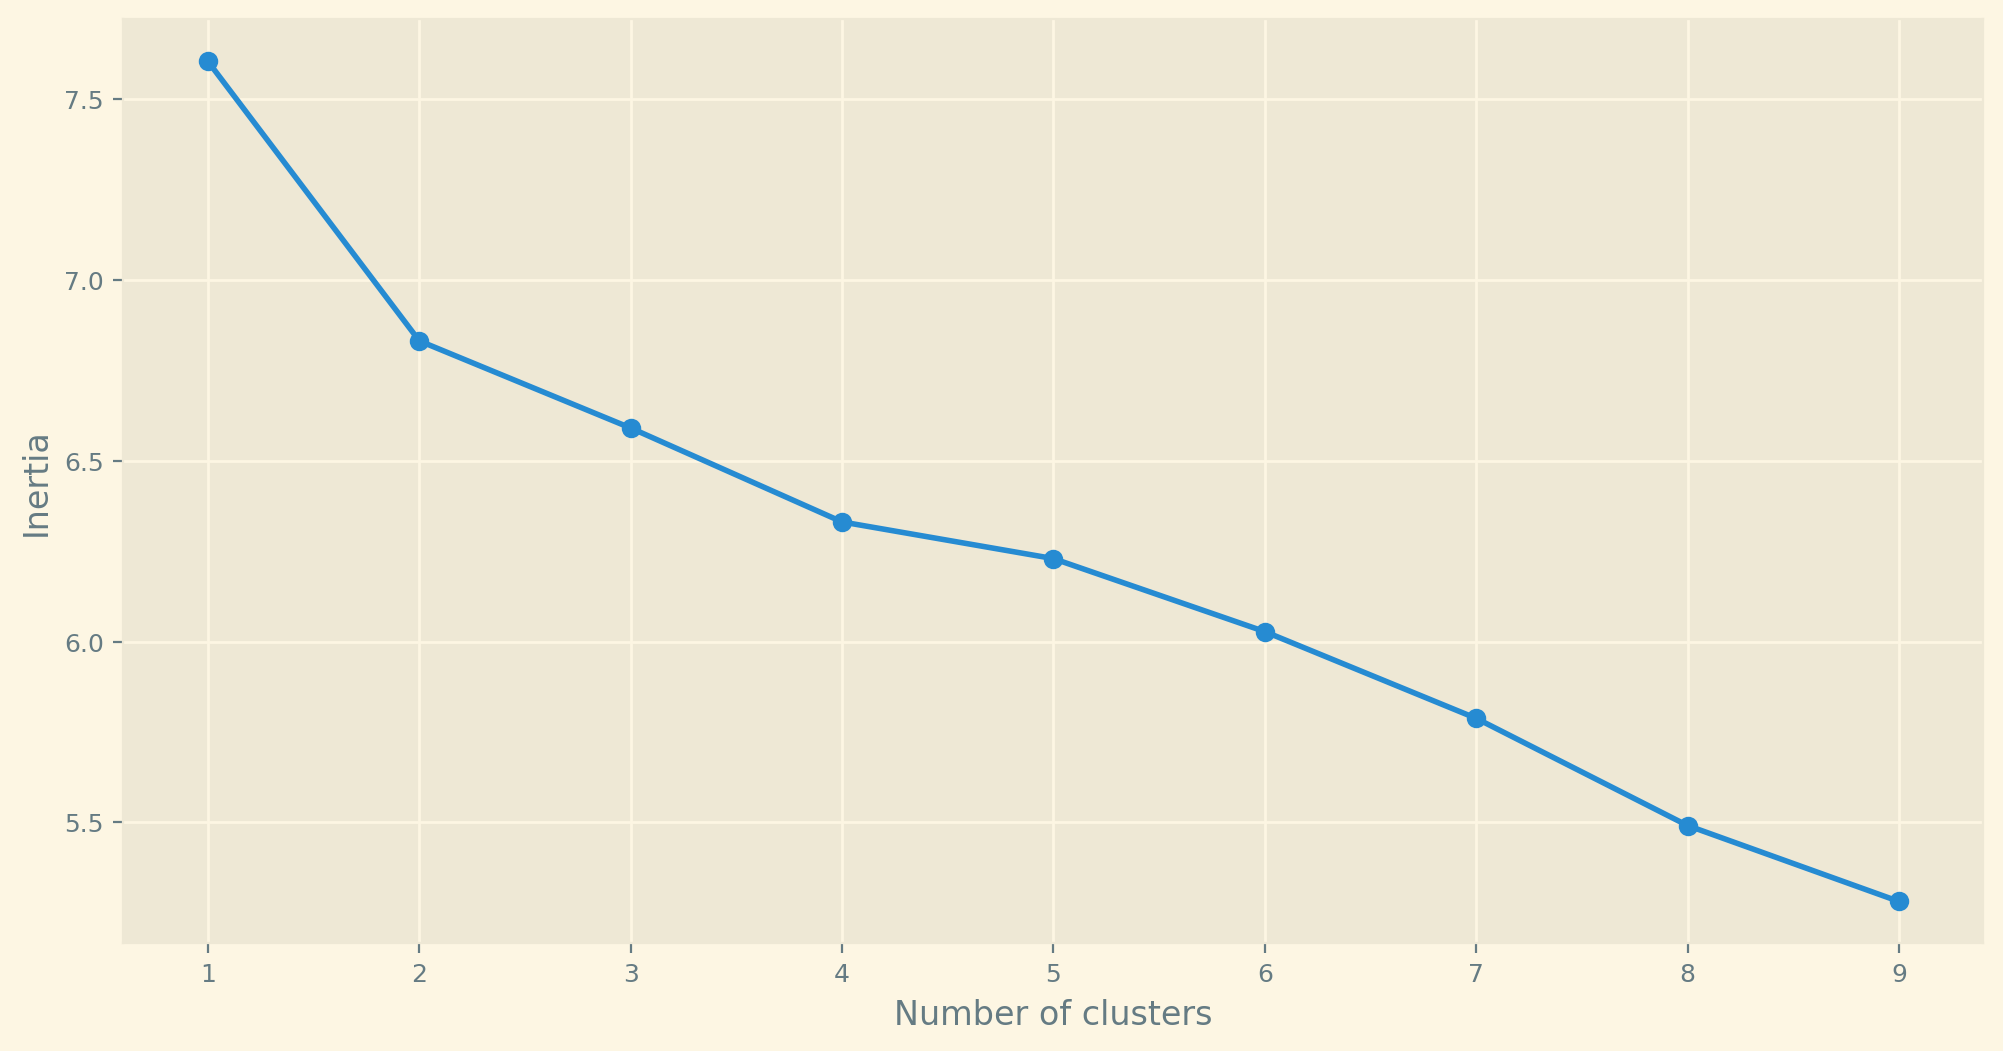

In [20]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='random', max_iter= 300, random_state = 1612)
    kmeans.fit(df_transposed)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [67]:
kl = KneeLocator(
    range(1, 10), SSE, curve="convex", direction="decreasing")
kl.elbow

np.int64(2)

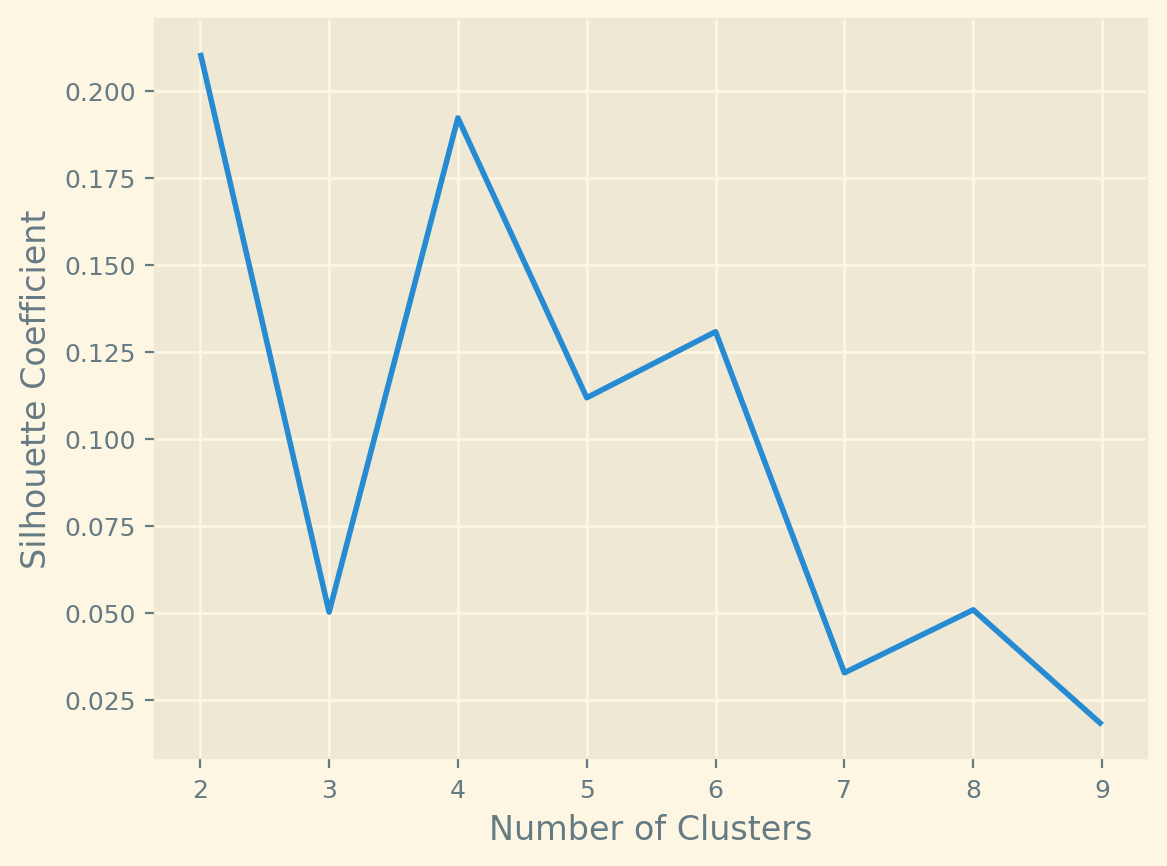

In [21]:
silhouette_coefficients = []
for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, init='random', max_iter= 300, random_state = 1612)
        kmeans.fit(df_transposed)
        score = silhouette_score(df_transposed, kmeans.labels_)
        silhouette_coefficients.append(score)


plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [23]:
kmeans = KMeans(init = "random", n_clusters=2, n_init=10, max_iter=300, random_state=1612)
kmeans.fit(df_transposed)

KMeans(init='random', n_clusters=2, n_init=10, random_state=1612)

In [25]:
pred = kmeans.predict(df_transposed)
df_transposed['cluster'] = pred
df_transposed['cluster'].value_counts()

cluster
1    64
0    20
Name: count, dtype: int64

In [ ]:
df_transposed[df_transposed['cluster'] == 0].index


Index(['ALPARGATAS', 'ASSAI', 'AZUL', 'AZZAS 2154', 'CARREFOUR BR', 'COGNA ON',
       'CVC BRASIL', 'CYRELA REALT', 'EZTEC', 'HAPVIDA', 'LOCALIZA',
       'LOJAS RENNER', 'LWSA', 'MAGAZ LUIZA', 'MRV', 'P.ACUCAR-CBD', 'PETZ',
       'VAMOS', 'VIVARA S.A.', 'YDUQS PART'],
      dtype='object', name='Price')

In [ ]:
df_transposed[df_transposed['cluster'] == 1].index


Index(['AMBEV S/A', 'AUREN', 'B3', 'BBSEGURIDADE', 'BRADESCO_x', 'BRADESCO_y',
       'BRADESPAR', 'BRASIL', 'BRASKEM', 'BRF SA', 'BTGP BANCO',
       'CAIXA SEGURI', 'CCR SA', 'CEMIG', 'COPEL', 'COSAN', 'CPFL ENERGIA',
       'CSNMINERACAO', 'ELETROBRAS_x', 'ELETROBRAS_y', 'EMBRAER', 'ENERGISA',
       'ENEVA', 'ENGIE BRASIL', 'EQUATORIAL', 'FLEURY', 'GERDAU', 'GERDAU MET',
       'GRUPO NATURA', 'HYPERA', 'IGUATEMI S.A', 'IRBBRASIL RE', 'ITAUSA',
       'ITAUUNIBANCO', 'JBS', 'KLABIN S/A', 'MARFRIG', 'MINERVA', 'MULTIPLAN',
       'PETROBRAS_x', 'PETROBRAS_y', 'PETRORECSA', 'PETRORIO', 'RAIADROGASIL',
       'RAIZEN', 'REDE D OR', 'RUMO S.A.', 'SABESP', 'SANTANDER BR',
       'SANTOS BRP', 'SAO MARTINHO', 'SID NACIONAL', 'SLC AGRICOLA',
       'SUZANO S.A.', 'TAESA', 'TELEF BRASIL', 'TIM', 'TOTVS', 'TRAN PAULIST',
       'ULTRAPAR', 'USIMINAS', 'VALE', 'VIBRA', 'WEG'],
      dtype='object', name='Price')

# GMM - Gaussian Mixture Models

In [41]:
# Fit the Gaussian Mixture Model
df_transposed  = df_adj_close.T
gmm = GaussianMixture(n_components=3)
gmm.fit(df_transposed)

# Predict the cluster labels
labels = gmm.predict(df_transposed)

# Add the cluster labels to the DataFrame
df_transposed['cluster_gmm'] = labels

In [42]:
df_transposed[df_transposed['cluster_gmm'] == 0].index

Index(['ALPARGATAS', 'AMBEV S/A', 'AUREN', 'AZZAS 2154', 'B3', 'BBSEGURIDADE',
       'BRADESCO_x', 'BRADESCO_y', 'BRASIL', 'BTGP BANCO', 'CAIXA SEGURI',
       'CCR SA', 'CEMIG', 'COPEL', 'CPFL ENERGIA', 'CYRELA REALT',
       'ELETROBRAS_x', 'ELETROBRAS_y', 'ENERGISA', 'ENEVA', 'ENGIE BRASIL',
       'EQUATORIAL', 'EZTEC', 'FLEURY', 'GRUPO NATURA', 'HAPVIDA', 'HYPERA',
       'IGUATEMI S.A', 'IRBBRASIL RE', 'ITAUSA', 'ITAUUNIBANCO', 'LOCALIZA',
       'LOJAS RENNER', 'MRV', 'MULTIPLAN', 'RAIADROGASIL', 'REDE D OR',
       'RUMO S.A.', 'SABESP', 'SANTANDER BR', 'SANTOS BRP', 'SAO MARTINHO',
       'SLC AGRICOLA', 'TAESA', 'TELEF BRASIL', 'TIM', 'TOTVS', 'TRAN PAULIST',
       'ULTRAPAR', 'VIBRA', 'VIVARA S.A.', 'WEG'],
      dtype='object', name='Price')

In [43]:
df_transposed[df_transposed['cluster_gmm'] == 1].index

Index(['BRADESPAR', 'BRASKEM', 'BRF SA', 'COSAN', 'CSNMINERACAO', 'EMBRAER',
       'GERDAU', 'GERDAU MET', 'JBS', 'KLABIN S/A', 'MARFRIG', 'MINERVA',
       'PETROBRAS_x', 'PETROBRAS_y', 'PETRORECSA', 'PETRORIO', 'RAIZEN',
       'SID NACIONAL', 'SUZANO S.A.', 'USIMINAS', 'VALE'],
      dtype='object', name='Price')

In [44]:
df_transposed[df_transposed['cluster_gmm'] == 2].index

Index(['ASSAI', 'AZUL', 'CARREFOUR BR', 'COGNA ON', 'CVC BRASIL', 'LWSA',
       'MAGAZ LUIZA', 'P.ACUCAR-CBD', 'PETZ', 'VAMOS', 'YDUQS PART'],
      dtype='object', name='Price')